- [api Axes.scatter](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)
- [Scatter plot](https://encyclopedia.thefreedictionary.com/scatter+plot)
- [Scatter plot : wikimili](https://wikimili.com/en/Scatter_plot)
- [A Complete Guide to Scatter Plots](https://chartio.com/learn/charts/what-is-a-scatter-plot/)

In [1]:
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib.axes import Axes
from matplotlib.markers import MarkerStyle
from matplotlib.collections import PathCollection
from matplotlib.transforms import IdentityTransform

import numpy as np
import inspect

In [9]:
rcParams['font.family'] = ['DengXian', 'Sans-serif']

我们在[matplotlib基础](https://zhuanlan.zhihu.com/p/147256790)中提过图表是由艺术家使用渲染器在画布上完成的。

而艺术家有两种类型：图元与容器。图元表示绘制在画布上的标准图形对象，如：Line2D，容器是放置图元的位置如：Axis，Axes和Figure。标准用法是创建一个Figure实例，使用Figure来创建一个或多个Axes或Subplot实例，并使用Axes实例的辅助方法创建图元。

Axes实例中有20个基础的辅助制图方法，其中就包括scatter方法。

In [3]:
inspect.signature(Axes.scatter)

<Signature (self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

散点图的首要目的是帮助人们直观的感受自变量与因变量的相关性。自变量与因变量自然也就是绘制散点图的必要参数。

数据将显示为点的集合，每个点的一个变量值确定水平轴上的位置，而另一个变量值确定垂直轴上的位置。

In [2]:
# fake data
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

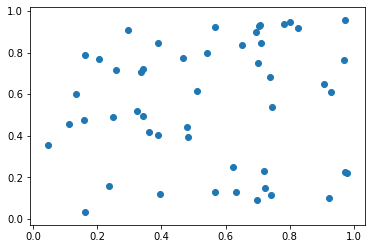

In [5]:
plt.scatter(x, y)

散点图用于识别两个定量变量之间的关系类型。通常，控制参数或自变量沿水平轴绘制，测量参数或因变量沿垂直轴绘制。如果不存在因变量，则可以在任一轴上绘制任一类型的变量，并且散点图将仅示出两个变量之间的相关程度（不是因果关系）。John Herschel是我们知道的第一个对散点图进行描述的人。

散点图使用笛卡尔坐标系显示一组数据，通常是两个变量的值。如果对点进行了编码（颜色/形状/大小），则可以显示一个或多个附加变量。

> scatter方法的参数 c 用于定义点的颜色，参数 s 用于定义点的大小。

### [Scatter plot](https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py)  
Shapes and collections - 16

In [3]:
# fake data 2
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2    # 0 to 15 point radii

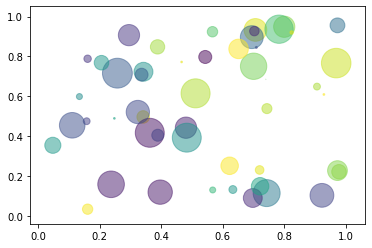

In [7]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

😺 “scatter真的的很简单，但是我的数据是表中的列啊！”

对于像numpy.recarry 或 pandas.DataFrame 这种类型的数据，matplotlib允许将其赋予data关键字参数，之后使用列名称字符串引用相应的数据。

### [Plotting with keywords](https://matplotlib.org/gallery/misc/keyword_plotting.html#sphx-glr-gallery-misc-keyword-plotting-py)  
Miscellaneous - 19

In [8]:
data = {
    'a' : x,
    'b' : y,
    'c' : area,
    'd' : colors
}

[Text(0, 0.5, 'entry b'), Text(0.5, 0, 'entry a')]

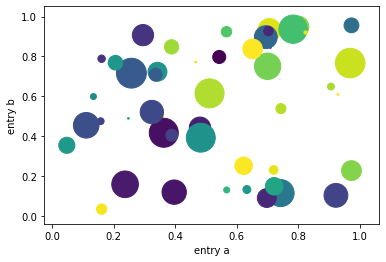

In [9]:
fig, ax = plt.subplots()
ax.scatter('a', 'b', s='c', c='d', data=data)
ax.set(xlabel='entry a', ylabel='entry b')

🐱 “看变了大小颜色，我形依然未变。”

scatter方法的参数 marker 用于定义点的形状。\\$\clubsuit$ 在Mathtext中是三叶草♣ ，希望在这个不太平的时期给我们每一个人带来些许的好运。

### [Scatter Symbol](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)  
Lines, bars and markers - 34

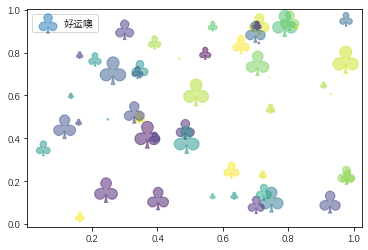

In [10]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5, marker='$\clubsuit$', label="好运噢")
plt.legend(loc='upper left')

😼“不使用scatter方法能画出散点图吗？”  
🐍“这不是自找麻烦吗？”  
😼“不行吗？”  

In [ ]:
from matplotlib.markers     import MarkerStyle
from matplotlib.collections import PathCollection
from matplotlib.transforms  import IdentityTransform

marker_obj = MarkerStyle('$\clubsuit$')
path = marker_obj.get_path().transformed(marker_obj.get_transform())
offsets = np.ma.column_stack([x, y])
fig, ax = plt.subplots()
collection = PathCollection(
        (path,), area,
        edgecolors='face',
        offsets=offsets,
        transOffset=ax.transData,
        alpha=0.5
        )
collection.set_transform(IdentityTransform())
collection.set_array(colors)
ax.add_collection(collection)

🐍 "可还行？"  
🐱 "还行，可是我不想要$\clubsuit$，也不想要⚪"

### [Scatter Custom Symbol](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_custom_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-custom-symbol-py)  
Lines, bars and markers - 28

In [4]:
rx, ry = 3., 1.
ellipse_area = rx * ry * np.pi
theta = np.arange(0, 2 * np.pi + 0.01, 0.1)
verts = np.column_stack([rx / ellipse_area * np.cos(theta), ry / ellipse_area * np.sin(theta)])

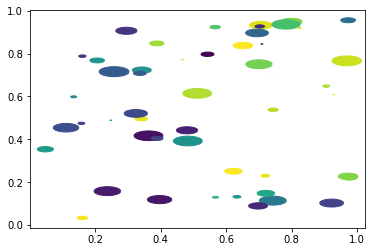

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y, area, colors, marker=verts)

😿 "我要星星！"

### [Scatter Star Poly](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py)  
Lines, bars and markers - 33

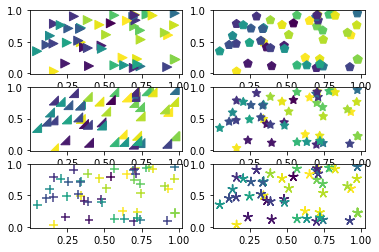

In [8]:
plt.subplot(321)
plt.scatter(x, y, s=80, c=colors, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=colors, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=colors, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=colors, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=colors, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=colors, marker=(5, 2))

😺 ""

### [Scatter Masked](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py)
Lines, bars and markers - 31

(0.0, 1.0)

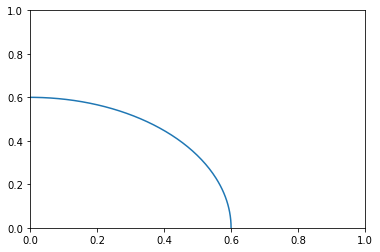

In [17]:
r0 = 0.6
theta = np.arange(0, np.pi / 2, 0.01)
#plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))
fig, ax = plt.subplots()
ax.plot(r0 * np.cos(theta), r0 * np.sin(theta))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

In [18]:
r0 = 0.6
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)

In [19]:
ax.scatter(x, y, s=area1, marker=(5, 2), c=colors)
ax.scatter(x, y, s=area2, marker=(5, 1), c=colors)

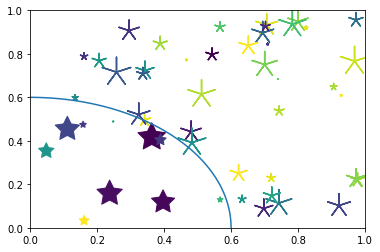

In [20]:
fig

~~第28课. 自定义符号散点图~~ >->> 

In [24]:
%matplotlib inline

In [7]:
# fake data
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2    # 0 to 15 point radii

In [2]:
marker_obj = MarkerStyle('$\clubsuit$')

In [4]:
path = marker_obj.get_path().transformed(marker_obj.get_transform())

In [8]:
offsets = np.ma.column_stack([x, y])

In [15]:
fig, ax = plt.subplots()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
collection = PathCollection(
        (path,), area,
        edgecolors='face',
        offsets=offsets,
        transOffset=ax.transData,
        alpha=0.5
        )
collection.set_transform(IdentityTransform())
collection.set_array(colors)
ax.add_collection(collection)